In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
print("GPU available:", tf.config.list_physical_devices('GPU'))

GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'train',
    shuffle = True,
    image_size = (300,300),
    batch_size = 32
)

Found 599 files belonging to 3 classes.


In [6]:
# ttest_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     'test',
#     shuffle = True,
#     image_size = (256,256),
#     batch_size = 32
# )

In [7]:
BATCH_SIZE = 32
IMAGE_SIZE = 300
CHANNELS=3
EPOCHS=20

In [8]:
class_names=train_dataset.class_names
class_names

['Dry Leaf', 'Healthy Leaf', 'Leaf Blotch']

In [9]:
for image_batch, labels_batch in train_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 300, 300, 3)
[0 2 0 0 0 1 2 1 1 0 2 0 0 2 1 1 0 2 0 0 1 2 0 0 1 1 0 2 1 0 1 1]


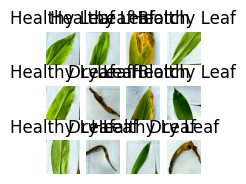

In [10]:
# print(labels_batch[i])
# print(labels_batch[i].numpy())

import numpy as np

plt.figure(figsize=(2, 2))
for image_batch, labels_batch in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [11]:
len(train_dataset)

19

In [12]:
train_size = 0.8
len(train_dataset)*train_size

15.200000000000001

In [13]:
trian_ds=train_dataset.take(54)
len(trian_ds)

19

In [14]:
test_ds=train_dataset.skip(54)
len(test_ds)

0

In [15]:
val_size=0.1
len(train_dataset)*val_size

1.9000000000000001

In [16]:
val_ds=train_dataset.take(6)
len(val_ds)

6

In [17]:
test_ds=test_ds.skip(6)
len(test_ds)

0

In [18]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):

  ds_size=len(ds)

  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)

  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)

  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds,val_ds,test_ds

In [19]:
trian_ds,val_ds,test_ds=get_dataset_partitions_tf(train_dataset)

In [20]:
len(trian_ds)

15

In [21]:
len(val_ds)

1

In [22]:
len(test_ds)

3

In [23]:
trian_ds=trian_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    # layers.Resizing(256,256),
    # layers.Rescaling(1.0/255)
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
  # layers.RandomFlip("horizontal_and_vertical"),
  # layers.RandomRotation(0.2),
])

In [26]:

# class_names = 3
# input_shape = (256, 256, 3)  

# model = models.Sequential([
#     resize_and_rescale,
#     data_augmentation,
#     layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(class_names, activation='softmax'),
# ])


# model.build(input_shape=(None, 256, 256, 3))  # Batch size can be 'None'


# model.summary()



input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    trian_ds,
    batch_size=32,
    validation_data=val_ds,
    verbose=1,
    epochs=25,
)

Epoch 1/25
15/15 [==============================] - 12s 222ms/step - loss: 1.0021 - accuracy: 0.4479 - val_loss: 0.5870 - val_accuracy: 0.7812
Epoch 2/25
15/15 [==============================] - 1s 95ms/step - loss: 0.5644 - accuracy: 0.7563 - val_loss: 0.6281 - val_accuracy: 0.7812
Epoch 3/25
15/15 [==============================] - 1s 89ms/step - loss: 0.5211 - accuracy: 0.7583 - val_loss: 0.4890 - val_accuracy: 0.7500
Epoch 4/25
15/15 [==============================] - 1s 88ms/step - loss: 0.3457 - accuracy: 0.8313 - val_loss: 0.2538 - val_accuracy: 0.8438
Epoch 5/25
15/15 [==============================] - 1s 89ms/step - loss: 0.3264 - accuracy: 0.8500 - val_loss: 0.2848 - val_accuracy: 0.8125
Epoch 6/25
15/15 [==============================] - 1s 89ms/step - loss: 0.2384 - accuracy: 0.8979 - val_loss: 0.1876 - val_accuracy: 0.9062
Epoch 7/25
15/15 [==============================] - 1s 89ms/step - loss: 0.1641 - accuracy: 0.9396 - val_loss: 0.1379 - val_accuracy: 0.9688
Epoch 8/25


In [29]:
scores = model.evaluate(test_ds)
scores

3/3 [==============================] - 1s 39ms/step - loss: 2.6105e-05 - accuracy: 1.0000


[2.6104562493856065e-05, 1.0]

In [30]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 15}

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
history.history['loss'][:5]

[1.0020955801010132,
 0.5644252896308899,
 0.5210585594177246,
 0.3457001745700836,
 0.32635992765426636]

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [34]:
# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(range(20), acc, label='Training Accuracy')
# plt.plot(range(20), val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(range(20), loss, label='Training Loss')
# plt.plot(range(20), val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

Found 1 files belonging to 2 classes.
(1, 256, 256, 3)
[1]
tf.Tensor(1, shape=(), dtype=int32)
first image to predict
Actual label: Healthy Leaf
1/1 [==============================] - 1s 721ms/step
predicted label: Leaf Blotch


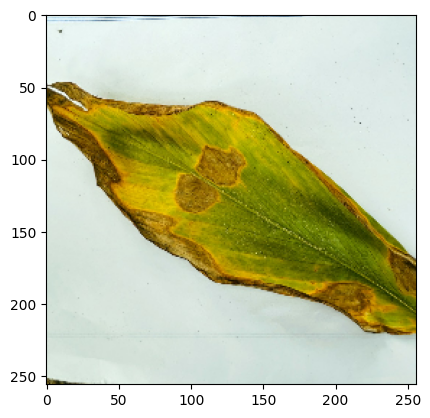

In [35]:
# class_names=train_dataset.class_names
# import numpy as np
# for image_batch,labels_batch in test_ds.take(1):
#     first_image = image_batch[0].numpy().astype("uint8")
#     first_label = labels_batch[0].numpy()

#     print("first image to predict")
#     plt.imshow(first_image)
#     print("Actual label:", class_names[first_label]) 

#     batch_prediction = model.predict(image_batch)
#     print("Predicted lable :",class_names[np.argmax(batch_prediction[0])])


    # actual_class = class_names[labels_batch[0]]
    # print("actual label:", actual_class)

import numpy as np
class_names=train_dataset.class_names
class_names
ttest_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'test',
    shuffle = True,
    image_size = (256,256),
    batch_size = 32
)
for image_batch, labels_batch in ttest_dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

for images_batch, labels_batch in ttest_dataset.take(1):
    print(labels_batch[0])
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    actual_class = class_names[labels_batch[0]]
    print("first image to predict")
    plt.imshow(first_image)
    print("Actual label:", actual_class) 
    
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 16ms/step


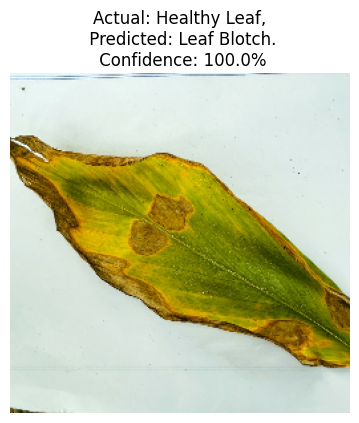

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in ttest_dataset.take(1):
    for i in range(1):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [38]:
import os
model_version=max([int(i) for i in os.listdir("model1") + [0]])+1
model.save(f"model1/{model_version}")

INFO:tensorflow:Assets written to: model1/4\assets


INFO:tensorflow:Assets written to: model1/4\assets
